## **Taller formativo Semana 2**
### **Curso**: Estadística Avanzada
### **Unidad 1**: Fundamentos de estadística avanzada

**Profesor:** Daniel Galves Arancibia

**Estudiante:** Camilo Roberto Maldonado Valderrama

**Pregunta 1:** Cargar el conjunto de datos proporcionado.

**Respuesta:** El sigueinte script importa la librería pandas para la manipulación del conunto de datos y cargar en un dataframe. A través de los métros head(), describe() e info() se obtiene la caracterización del dataset, su encabezado, estadísticas descriptivas principales e información de registros y tipo de datos. 

In [1]:
import pandas as pd

# Leer el archivo Excel
df = pd.read_excel('taller_datos_S2.xlsx')

# Mostrar el encabezado de la tabla
print(df.head())

# Mostrar estadísticas descriptivas con el método describe()
print(df.describe())

# Mostrar info()
print(df.info())

   student_id exam_score  passed
0           1      92.64       1
1           2       79.0       0
2           3      84.79       0
3           4      97.41       0
4           5      93.68       0
       student_id      passed
count  149.000000  149.000000
mean    75.000000    0.677852
std     43.156691    0.468875
min      1.000000    0.000000
25%     38.000000    0.000000
50%     75.000000    1.000000
75%    112.000000    1.000000
max    149.000000    1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  149 non-null    int64 
 1   exam_score  149 non-null    object
 2   passed      149 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ KB
None


**Limpieza de datos:** Antes de avanzar en cálculos estadísticos realziaremos una limpieza de los datos. Como muestra el método info() de la tabla anterior la columna 'exam_score' posee datos de tipo object. Con este tipo de dato no es posible realizar cálculos estadisticos por lo que se remplazará a tipo de dato numérico float.

In [2]:
# Limpiar la columna 'exam_score' para eliminar comas, puntos extra y convertir a float
df['exam_score'] = df['exam_score'].str.replace(',', '.').str.rstrip('.').astype(float)

# Verificar el tipo de dato de la columna 'exam_score' después de la conversión
print(df.dtypes)

# Mostrar las primeras filas del DataFrame para verificar la conversión
print(df.head())

student_id      int64
exam_score    float64
passed          int64
dtype: object
   student_id  exam_score  passed
0           1       92.64       1
1           2       79.00       0
2           3       84.79       0
3           4       97.41       0
4           5       93.68       0


**Pregunta 2:** Calcular la media muestral y la varianza muestral.

In [4]:
# Calcular la media muestral de las calificaciones
media_muestral = df['exam_score'].mean()

# Calcular la varianza muestral de las calificaciones
varianza_muestral = df['exam_score'].var(ddof=1)  # ddof=1 para varianza muestral

# Mostrar los resultados
print(f"Media muestral de las calificaciones: {media_muestral:.2f}")
print(f"Varianza muestral de las calificaciones: {varianza_muestral:.2f}")

Media muestral de las calificaciones: 76.29
Varianza muestral de las calificaciones: 105.26


**Pregunta 3:** Comparar las estimaciones puntuales con las estadísticas conocidas de la población, si están disponibles.

**Respuesta:** Este punto será omitido ya que no existen datos de la población. sólo se tienen datos de los 150 registros del archivo excel proporcionado.

**Pregunta 4:** Seleccionar una muestra aleatoria del conjunto de datos.

**Respuesta:** Se seleccionará una muestra aleatoria de 30 registros del conjunto de datos. Este tamaño de muestra es arbitrario. El parámetro random_state se utiliza para asegurar que los resultados sean reproducibles.

In [6]:
# Seleccionar una muestra aleatoria de tamaño 30 
muestra_aleatoria = df.sample(n=30, random_state=42) 

# Mostrar la muestra aleatoria
print(muestra_aleatoria.head())

     student_id  exam_score  passed
73           74       62.65       1
18           19       78.13       1
117         118       73.45       0
78           79       71.88       0
76           77       66.29       1


**Pregunta 5:** Calcular el intervalo de confianza del 95% para la media de la muestra.

**Respuesta:** Para calcular el intervalo de confianza del 95% para la media de la muestra, seguimos los siguientes pasos:

1. **Calcular la media de la muestra**: Obtenemos la media de la columna `exam_score` de la muestra aleatoria seleccionada, utilizando `media_muestral = muestra_aleatoria['exam_score'].mean()`.

2. **Calcular la desviación estándar de la muestra**: Calculamos la desviación estándar de la muestra con `desviacion_estandar_muestral = muestra_aleatoria['exam_score'].std(ddof=1)`, donde `ddof=1` asegura que se use la fórmula de la desviación estándar muestral.

3. **Determinar el tamaño de la muestra**: Obtenemos el tamaño de la muestra con `tamaño_muestra = len(muestra_aleatoria)`.

4. **Establecer el nivel de confianza**: Definimos el nivel de confianza en 95%, lo que implica que `nivel_confianza = 0.95` y `alfa = 1 - nivel_confianza`.

5. **Calcular el valor crítico $$Z_{\alpha/2}$$**: Utilizamos `z_critical = stats.norm.ppf(1 - alfa/2)` para obtener el valor crítico de la distribución normal estándar, que es aproximadamente 1.96 para un nivel de confianza del 95%.

6. **Calcular el error estándar**: Calculamos el error estándar con la fórmula $$\text{Error estándar} = \frac{s}{\sqrt{n}}$$, donde $$s$$ es la desviación estándar de la muestra y $$n$$ es el tamaño de la muestra. En el código, esto se hace con `error_estandar = desviacion_estandar_muestral / np.sqrt(tamaño_muestra)`.

7. **Calcular el margen de error**: El margen de error se obtiene multiplicando el valor crítico por el error estándar, es decir, $$\text{Margen de error} = Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$$. En el código, esto es `margen_error = z_critical * error_estandar`.

8. **Calcular el intervalo de confianza**: Finalmente, calculamos el intervalo de confianza utilizando la fórmula $$\text{Intervalo de confianza} = \bar{x} \pm Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$$, donde $$\bar{x}$$ es la media de la muestra. En el código, esto se hace con `intervalo_confianza = (media_muestral - margen_error, media_muestral + margen_error)`.

9. **Mostrar los resultados**: Imprimimos la media muestral, la desviación estándar muestral y el intervalo de confianza calculado.

La fórmula matemática para el intervalo de confianza es:

$$
\text{Intervalo de confianza} = \bar{x} \pm Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}
$$

donde:
- $\bar{x}$ es la media de la muestra,
- $s$ es la desviación estándar de la muestra,
- $n$ es el tamaño de la muestra,
- $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar para un nivel de confianza del 95%, que es aproximadamente 1.96.

In [8]:
import numpy as np
from scipy import stats

# Calcular la media de la muestra
media_muestral = muestra_aleatoria['exam_score'].mean()

# Calcular la desviación estándar de la muestra
desviacion_estandar_muestral = muestra_aleatoria['exam_score'].std(ddof=1)  # ddof=1 para desviación estándar muestral

# Tamaño de la muestra
tamaño_muestra = len(muestra_aleatoria)

# Nivel de confianza del 95%
nivel_confianza = 0.95
alfa = 1 - nivel_confianza
z_critical = stats.norm.ppf(1 - alfa/2)

# Error estándar
error_estandar = desviacion_estandar_muestral / np.sqrt(tamaño_muestra)

# Intervalo de confianza
margen_error = z_critical * error_estandar
intervalo_confianza = (media_muestral - margen_error, media_muestral + margen_error)

# Mostrar los resultados
print(f"Media muestral: {media_muestral:.2f}")
print(f"Desviación estándar muestral: {desviacion_estandar_muestral:.2f}")
print(f"Intervalo de confianza del 95% para la media de la muestra: {intervalo_confianza[0]:.2f} a {intervalo_confianza[1]:.2f}")

Media muestral: 78.01
Desviación estándar muestral: 9.86
Intervalo de confianza del 95% para la media de la muestra: 74.48 a 81.54


**Pregunta 6:** Calcular el intervalo de confianza del 95% para una proporción en la muestra (e.g., la proporción de estudiantes que aprobaron un examen).

In [9]:
# Calcular la proporción de estudiantes que aprobaron el examen
proporcion_aprobados = muestra_aleatoria['passed'].mean()  # 'passed' es 1 si aprobó, 0 si no aprobó

# Tamaño de la muestra
tamaño_muestra = len(muestra_aleatoria)

# Nivel de confianza del 95%
nivel_confianza = 0.95
alfa = 1 - nivel_confianza
z_critical = stats.norm.ppf(1 - alfa/2)

# Error estándar
error_estandar = np.sqrt(proporcion_aprobados * (1 - proporcion_aprobados) / tamaño_muestra)

# Intervalo de confianza
margen_error = z_critical * error_estandar
intervalo_confianza = (proporcion_aprobados - margen_error, proporcion_aprobados + margen_error)

# Mostrar los resultados
print(f"Proporción de estudiantes que aprobaron el examen: {proporcion_aprobados:.2f}")
print(f"Intervalo de confianza del 95% para la proporción de aprobados: {intervalo_confianza[0]:.2f} a {intervalo_confianza[1]:.2f}")

Proporción de estudiantes que aprobaron el examen: 0.73
Intervalo de confianza del 95% para la proporción de aprobados: 0.58 a 0.89


**Pregunta 7:** Interpreta los resultados.

**Respuesta:**

**Proporción de estudiantes que aprobaron el examen: 0.73**

Este valor indica que en la muestra seleccionada el 73% de los estudiantes aprobaron el examen.

**Intervalo de confianza del 95% para la proporción de aprobados: 0.58 a 0.89**

El intervalo de confianza del 95% para la proporción de estudiantes que aprobaron el examen se encuentra entre 0.58 y 0.89. Esto significa que con un nivel de confianza del 95% podemos afirmar que la proporción real de estudiantes que aprobaron el examen en la población completa se encuentra dentro de este rango.

**Pregunta 8:** Dividir el conjunto de datos en múltiples muestras aleatorias de igual tamaño.

**Respuesta:** Para dividir el conjunto de datos en muestras aleatorias de igual tamaño utilizaremos la función 'sample' de pandas. Continuaremos con una muestra de 30 registros. Crearemos 5 muestras iguales. 

In [17]:
# Tamaño de cada muestra 
tamaño_muestra = 30

# Número de muestras que deseas crear 
numero_muestras = 5

# Lista para almacenar las muestras
muestras = []

# Crear múltiples muestras aleatorias
for i in range(numero_muestras):
    # Seleccionar una muestra aleatoria sin reemplazo
    muestra = df.sample(n=tamaño_muestra, random_state=i)
    muestras.append(muestra)
    
    # Mostrar la muestra
    print(f"Muestra {i+1}:")
    print(muestra.head())
    print("\n")

Muestra 1:
     student_id  exam_score  passed
133         134       75.32       1
109         110       89.81       1
59           60       71.37       1
80           81       63.35       1
7             8       73.49       1


Muestra 2:
     student_id  exam_score  passed
145         146       84.44       1
89           90       85.54       1
54           55       74.72       0
77           78       69.21       1
84           85       89.88       1


Muestra 3:
     student_id  exam_score  passed
115         116       83.02       1
48           49       58.86       0
3             4       97.41       0
42           43       57.94       1
126         127       70.65       1


Muestra 4:
    student_id  exam_score  passed
99         100       79.02       0
40          41       64.51       1
3            4       97.41       0
53          54       63.19       0
47          48       82.77       0


Muestra 5:
     student_id  exam_score  passed
25           26       60.46       0
11     

**Pregunta 9:** Calcular la media de cada muestra.

**Respuesta:** 

In [18]:
# Calcular la media de cada muestra
for i, muestra in enumerate(muestras):
    media_muestral = muestra['exam_score'].mean()
    print(f"Media de la muestra {i+1}: {media_muestral:.2f}")

Media de la muestra 1: 76.03
Media de la muestra 2: 75.71
Media de la muestra 3: 74.88
Media de la muestra 4: 72.88
Media de la muestra 5: 76.62


**Pregunta 10:** Calcular la media de cada muestra.

**Respuesta:** Para graficar la media de cada muestra utilziaremos la biblioteca matplotlib.

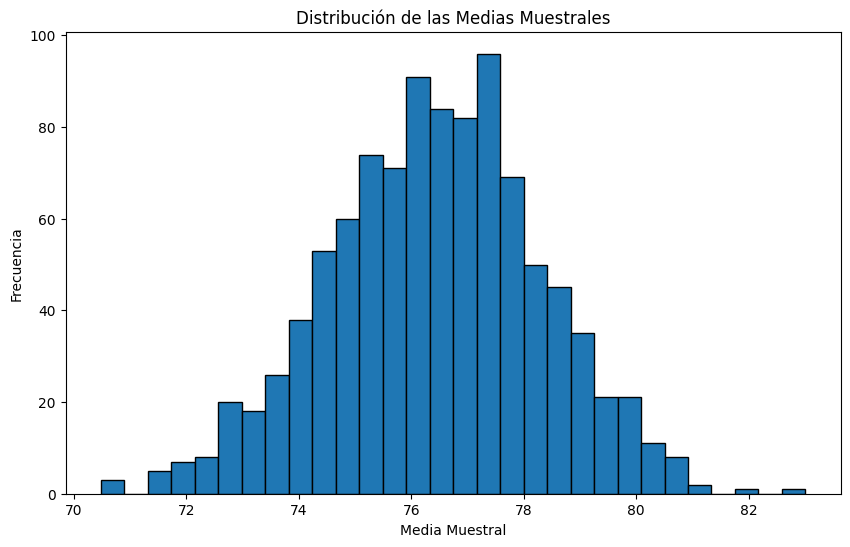

In [22]:
import matplotlib.pyplot as plt

# Número de muestras 
numero_muestras = 1000 # Aumentamos el número de muestras para una mejor visualización de la distribución

# Lista para almacenar las medias muestrales
medias_muestrales = []

# Crear múltiples muestras aleatorias y calcular sus medias
for i in range(numero_muestras):
    # Seleccionar una muestra aleatoria sin reemplazo
    muestra = df.sample(n=tamaño_muestra, replace=True, random_state=i)  # Usamos replace=True para permitir el muestreo con reemplazo
    media_muestral = muestra['exam_score'].mean()
    medias_muestrales.append(media_muestral)

# Graficar la distribución de las medias muestrales
plt.figure(figsize=(10, 6))
plt.hist(medias_muestrales, bins=30, edgecolor='black')
plt.title('Distribución de las Medias Muestrales')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.show()

**Pregunta 11:** Comparar la distribución obtenida con una distribución normal.

**Respuesta:** 

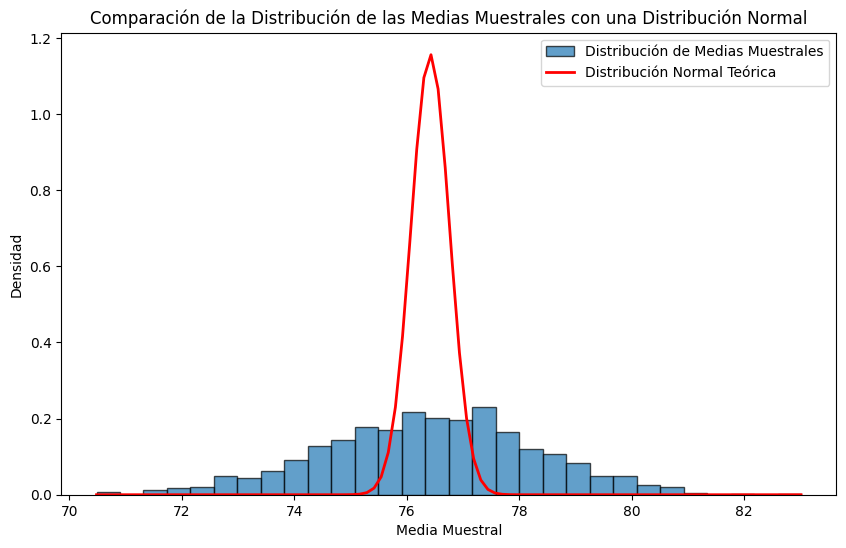

In [ ]:
# Número de muestras 
numero_muestras = 1000  # Aumentamos el número de muestras para una mejor visualización de la distribución

# Lista para almacenar las medias muestrales
medias_muestrales = []

# Crear múltiples muestras aleatorias y calcular sus medias
for i in range(numero_muestras):
    # Seleccionar una muestra aleatoria sin reemplazo
    muestra = df.sample(n=tamaño_muestra, replace=True, random_state=i)  # Usamos replace=True para permitir el muestreo con reemplazo
    media_muestral = muestra['exam_score'].mean()
    medias_muestrales.append(media_muestral)

# Calcular la media y el error estándar de las medias muestrales
media_medias = np.mean(medias_muestrales)
std_medias = np.std(medias_muestrales, ddof=1) / np.sqrt(tamaño_muestra)  # Error estándar de las medias muestrales

# Graficar la distribución de las medias muestrales y superponer una distribución normal
plt.figure(figsize=(10, 6))
plt.hist(medias_muestrales, bins=30, density=True, edgecolor='black', alpha=0.7, label='Distribución de Medias Muestrales')

# Generar la curva de densidad normal teórica
x = np.linspace(min(medias_muestrales), max(medias_muestrales), 100)
y = stats.norm.pdf(x, media_medias, std_medias)
plt.plot(x, y, 'r-', lw=2, label='Distribución Normal Teórica')

plt.title('Comparación de la Distribución de las Medias Muestrales con una Distribución Normal')
plt.xlabel('Media Muestral')
plt.ylabel('Densidad')
plt.legend()
##plt.show()

## ANÁLISIS FINAL

**1. Descripción de los métodos utilizados**

Para llevar a cabo este análisis estadístico, utilizamos el lenguaje de programación Python junto con varias bibliotecas especializadas. Empleamos pandas para la manipulación y análisis de datos, numpy para operaciones numéricas y matplotlib para la visualización gráfica. Además, utilizamos scipy para cálculos estadísticos avanzados, como la obtención de valores críticos de la distribución normal y la generación de curvas de densidad.

El proceso comenzó con la lectura de un archivo Excel que contenía datos de calificaciones de exámenes y aprobación de estudiantes. Limpiamos y convertimos los datos a formatos numéricos adecuados para el análisis. Luego, seleccionamos múltiples muestras aleatorias de tamaño fijo (30 estudiantes) y calculamos la media de las calificaciones para cada muestra. También calculamos intervalos de confianza del 95% tanto para la media de las calificaciones como para la proporción de estudiantes que aprobaron el examen. Finalmente, graficamos la distribución de las medias muestrales y la comparamos con una distribución normal teórica.

**2. Resultados obtenidos**
Los resultados del análisis mostraron que la proporción de estudiantes que aprobaron el examen en la muestra seleccionada fue del 73%. El intervalo de confianza del 95% para esta proporción se situó entre el 58% y el 89%, lo que indica una considerable incertidumbre en la estimación de la proporción real en la población.

Para la media de las calificaciones, seleccionamos 1000 muestras aleatorias de 30 estudiantes cada una y calculamos la media de cada muestra. La distribución de estas medias muestrales fue graficada en un histograma con 30 bins. Al comparar esta distribución con una distribución normal teórica, observamos que la densidad máxima de la curva normal alcanzó aproximadamente 1.2, mientras que la densidad máxima del histograma de las medias muestrales fue de alrededor de 0.2. Esto sugiere que la distribución de las medias muestrales es más plana y tiene una mayor variabilidad de lo que predice la distribución normal teórica.

**3. Conclusiones**
El análisis reveló que, aunque la proporción de estudiantes que aprobaron el examen en la muestra fue alta (73%), el intervalo de confianza del 95% indica una amplia variabilidad en la estimación de la proporción real en la población, oscilando entre el 58% y el 89%. Esto sugiere que, aunque la muestra indica un buen rendimiento, la incertidumbre sobre la proporción real es significativa.

La distribución de las medias muestrales no se ajustó perfectamente a una distribución normal, lo cual puede atribuirse a la variabilidad inherente en los datos originales de las calificaciones o al tamaño relativamente pequeño de las muestras (30 estudiantes). Este hallazgo subraya la importancia de considerar la distribución de los datos originales y el tamaño de la muestra al aplicar el Teorema del Límite Central. Para futuros análisis, sería beneficioso aumentar el tamaño de la muestra y evaluar la normalidad de los datos originales para obtener estimaciones más precisas y confiables.

**Referencias**
McKinney, W. (2012). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. O'Reilly Media.
VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media.
Walpole, R. E., Myers, R. H., Myers, S. L., & Ye, K. (2012). Probability and Statistics for Engineers and Scientists (9th ed.). Pearson.

In [26]:
# Leer el archivo Excel
df = pd.read_excel('taller_datos_S2.xlsx')

# Limpiar la columna 'exam_score' para eliminar comas, puntos extra y convertir a float
df['exam_score'] = df['exam_score'].str.replace(',', '.').str.rstrip('.').astype(float)

# Guardar el DataFrame limpio en un archivo CSV
df.to_csv('taller_datos_S2_limpio.csv', index=False)